I use "dask" package to deal with our dataset.

You can use "pandas" as well, I think it will also work.
(Becaue our dataset is not very large)

In [0]:
#dask
import dask.dataframe as dd

In [4]:
# import Google Drive 套件
from google.colab import drive

# 將自己的雲端硬碟掛載上去
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# 透過 gdrive/My Drive/... 來存取檔案
data_df = dd.read_csv('gdrive/My Drive/TEJ_Whole_year_Jieba.csv')

In [6]:
data_df

,個股代號,公司簡稱,事件日,TCRI(年/月),事件強度,大事件類別,小事件類別,事件內容,content_tokenized
npartitions=1,,,,,,,,,
,int64,object,int64,object,int64,object,object,object,object
,...,...,...,...,...,...,...,...,...


In [7]:
# Import packages

import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


import gc #Garbage Collector interface
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
# Data pre-processing

import keras
MAX_NUM_WORDS = 10000
tokenizer = keras .preprocessing.text.Tokenizer(num_words=MAX_NUM_WORDS)

corpus = data_df.content_tokenized

tokenizer.fit_on_texts(corpus)

x = tokenizer.texts_to_sequences(corpus)

len(x)

x[:1]

for seq in x[:1]:
    print([tokenizer.index_word[idx] for idx in seq])
    
for seq in x[:20]:
    print(len(seq), seq[:5], ' ...')
    
max_seq_len = max([
    len(seq) for seq in x])

max_seq_len

MAX_SEQUENCE_LENGTH = 150

Using TensorFlow backend.


['發言', '人', '內部', '調動', '由', '接任']
6 [458, 36, 83, 142, 29]  ...
7 [83, 378, 138, 83, 142]  ...
6 [422, 138, 83, 142, 29]  ...
6 [83, 378, 138, 142, 29]  ...
6 [126, 162, 83, 142, 29]  ...
6 [294, 138, 83, 142, 29]  ...
7 [2598, 246, 29, 87, 246]  ...
13 [460, 10, 85, 4, 6171]  ...
7 [554, 10, 85, 64, 4]  ...
6 [62, 162, 83, 142, 29]  ...
6 [62, 162, 83, 142, 29]  ...
225 [3046, 848, 2288, 1386, 48]  ...
17 [460, 10, 85, 4, 6843]  ...
8 [422, 138, 83, 142, 29]  ...
6 [126, 162, 83, 142, 29]  ...
6 [422, 138, 83, 142, 29]  ...
6 [62, 162, 83, 142, 29]  ...
6 [294, 138, 83, 142, 29]  ...
6 [62, 162, 83, 142, 29]  ...
6 [62, 162, 83, 142, 29]  ...


In [0]:
x = keras .preprocessing .sequence .pad_sequences(x, maxlen=MAX_SEQUENCE_LENGTH)

# Model 1 : predict 3 classes
20000 features

In [0]:
y = np.asarray(data_df["事件強度"])

### Option: consider only 3 classes: positive , neutral, and negative
y = np.where(y>0, 1, y) 
y = np.where(y<0, -1, y)

y = np.asarray(pd.get_dummies(y))

In [0]:
# Split data to training data and testing data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
# Oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 22312 samples, validate on 5579 samples
Epoch 1/10
22312/22312 [==============================] - 13s 604us/step - loss: 0.8366 - accuracy: 0.7013 - val_loss: 1.4075 - val_accuracy: 0.0649
Epoch 2/10
22312/22312 [==============================] - 11s 503us/step - loss: 0.4085 - accuracy: 0.8417 - val_loss: 0.7579 - val_accuracy: 0.6648
Epoch 3/10
22312/22312 [==============================] - 11s 498us/step - loss: 0.2495 - accuracy: 0.9117 - val_loss: 0.4496 - val_accuracy: 0.8376
Epoch 4/10
22312/22312 [==============================] - 11s 511us/step - loss: 0.1759 - accuracy: 0.9429 - val_loss: 0.2500 - val_accuracy: 0.9466
Epoch 5/10
22312/22312 [==============================] - 11s 511us/step - loss: 0.1251 - accuracy: 0.9602 - val_loss: 0.1813 - val_accuracy: 0.9670
Epoch 6/10
22312/22312 [==============================] - 11s 514us/step - loss: 0.0907 - accuracy: 0.9723 - val_loss: 0.1001 - val_accuracy: 0.9882
Epoch 7/10
22312/22312 [==============================] -

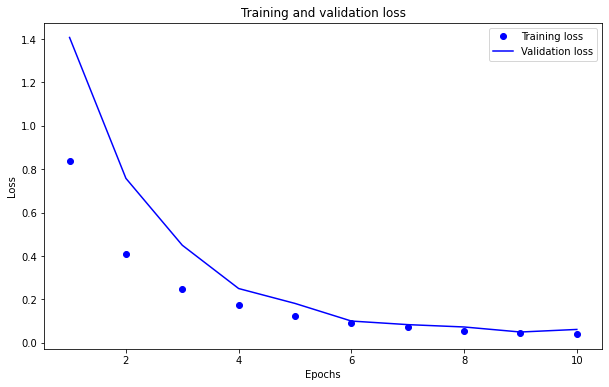

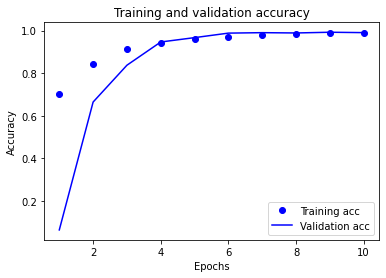

In [22]:
# Build our neural network model with LSTM

from keras import models
from keras import layers

max_features = 20000

from keras.layers import LSTM
model = models.Sequential()
model.add(layers.Embedding(max_features, 100)) 
model.add(layers.LSTM(32))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Iterate on your training data by calling the fit() method of your model
history = model.fit(X_train_res, y_train_res,
                    epochs=10,
                    batch_size=500,
                   validation_split=0.2)

# plot the results of loss values from the training set and validtion set
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.figure(figsize=(10,6))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# plot the results of accuracy from the training set and validtion set
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [29]:
results = model.evaluate(X_test, y_test)
print(results)

4741/4741 [==============================] - 3s 681us/step
[0.5188424960643122, 0.8675385117530823]


# Mode2: Predict 7 classes: 20000 features

In [0]:
y = np.asarray(data_df["事件強度"])

'''
### Option: consider only 3 classes: positive , neutral, and negative
y = np.where(y>0, 1, y) 
y = np.where(y<0, -1, y)
'''

y = np.asarray(pd.get_dummies(y))

In [0]:
# Split data to training data and testing data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
# Oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 47919 samples, validate on 11980 samples
Epoch 1/10
47919/47919 [==============================] - 26s 533us/step - loss: 1.1902 - accuracy: 0.6493 - val_loss: 3.6792 - val_accuracy: 0.2871
Epoch 2/10
47919/47919 [==============================] - 25s 527us/step - loss: 0.3095 - accuracy: 0.9217 - val_loss: 3.5626 - val_accuracy: 0.2907
Epoch 3/10
47919/47919 [==============================] - 26s 540us/step - loss: 0.1598 - accuracy: 0.9562 - val_loss: 3.2146 - val_accuracy: 0.2907
Epoch 4/10
47919/47919 [==============================] - 26s 543us/step - loss: 0.1100 - accuracy: 0.9700 - val_loss: 2.9247 - val_accuracy: 0.2907
Epoch 5/10
47919/47919 [==============================] - 26s 548us/step - loss: 0.0801 - accuracy: 0.9790 - val_loss: 2.5108 - val_accuracy: 0.2907
Epoch 6/10
47919/47919 [==============================] - 26s 545us/step - loss: 0.0644 - accuracy: 0.9832 - val_loss: 2.1707 - val_accuracy: 0.2907
Epoch 7/10
47919/47919 [==============================] 

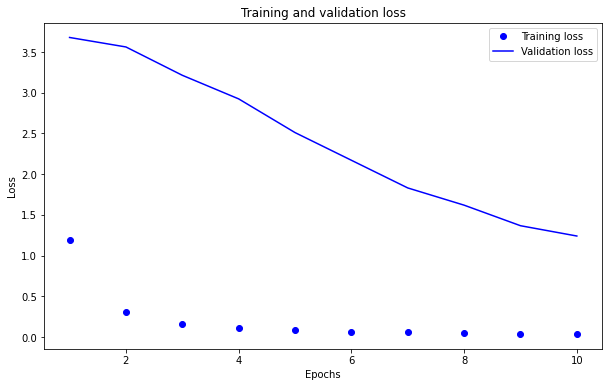

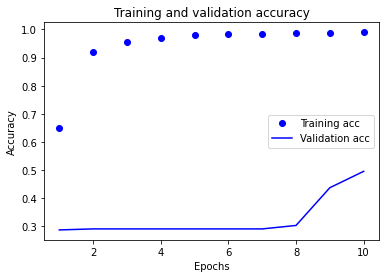

In [37]:
# Build our neural network model with LSTM

from keras import models
from keras import layers

max_features = 20000

from keras.layers import LSTM
model = models.Sequential()
model.add(layers.Embedding(max_features, 100)) 
model.add(layers.LSTM(32))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Iterate on your training data by calling the fit() method of your model
history = model.fit(X_train_res, y_train_res,
                    epochs=10,
                    batch_size=500,
                   validation_split=0.2)

# plot the results of loss values from the training set and validtion set
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.figure(figsize=(10,6))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# plot the results of accuracy from the training set and validtion set
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [38]:
results = model.evaluate(X_test, y_test)
print(results)

4741/4741 [==============================] - 3s 727us/step
[0.5964071755544015, 0.850242555141449]


# Model 3: Predict 7 classes: 
20000 features
20 epochs

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 47919 samples, validate on 11980 samples
Epoch 1/20
47919/47919 [==============================] - 26s 545us/step - loss: 1.1630 - accuracy: 0.6896 - val_loss: 3.2509 - val_accuracy: 0.2823
Epoch 2/20
47919/47919 [==============================] - 26s 535us/step - loss: 0.3466 - accuracy: 0.9171 - val_loss: 3.3563 - val_accuracy: 0.2907
Epoch 3/20
47919/47919 [==============================] - 25s 525us/step - loss: 0.1784 - accuracy: 0.9536 - val_loss: 2.9657 - val_accuracy: 0.2907
Epoch 4/20
47919/47919 [==============================] - 26s 533us/step - loss: 0.1231 - accuracy: 0.9680 - val_loss: 2.5052 - val_accuracy: 0.2907
Epoch 5/20
47919/47919 [==============================] - 25s 529us/step - loss: 0.0891 - accuracy: 0.9765 - val_loss: 1.9393 - val_accuracy: 0.2907
Epoch 6/20
47919/47919 [==============================] - 25s 532us/step - loss: 0.0797 - accuracy: 0.9774 - val_loss: 1.5313 - val_accuracy: 0.2907
Epoch 7/20
47919/47919 [==============================] 

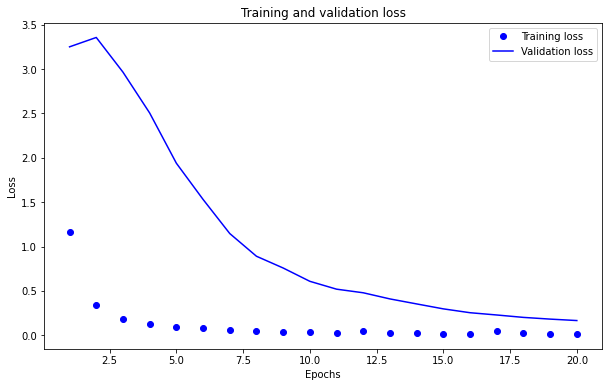

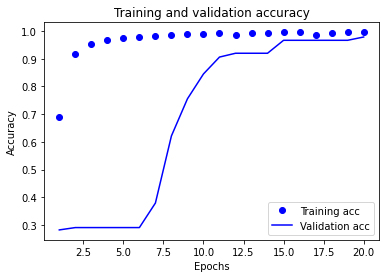

In [42]:
# Build our neural network model with LSTM

from keras import models
from keras import layers

max_features = 30000

from keras.layers import LSTM
model = models.Sequential()
model.add(layers.Embedding(max_features, 100)) 
model.add(layers.LSTM(32))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Iterate on your training data by calling the fit() method of your model
history = model.fit(X_train_res, y_train_res,
                    epochs=20,
                    batch_size=500,
                   validation_split=0.2)

# plot the results of loss values from the training set and validtion set
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.figure(figsize=(10,6))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# plot the results of accuracy from the training set and validtion set
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [40]:
results = model.evaluate(X_test, y_test)
print(results)

4741/4741 [==============================] - 3s 704us/step
[0.6138619492009229, 0.8498207330703735]


# Model 4: Predict 7 classes:

25000 features

20 epochs

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 47919 samples, validate on 11980 samples
Epoch 1/20
47919/47919 [==============================] - 26s 545us/step - loss: 1.1249 - accuracy: 0.6675 - val_loss: 3.8745 - val_accuracy: 0.2805
Epoch 2/20
47919/47919 [==============================] - 25s 527us/step - loss: 0.2761 - accuracy: 0.9272 - val_loss: 3.1280 - val_accuracy: 0.2907
Epoch 3/20
47919/47919 [==============================] - 26s 539us/step - loss: 0.1547 - accuracy: 0.9585 - val_loss: 2.1908 - val_accuracy: 0.2907
Epoch 4/20
47919/47919 [==============================] - 26s 538us/step - loss: 0.1136 - accuracy: 0.9697 - val_loss: 1.7516 - val_accuracy: 0.2907
Epoch 5/20
47919/47919 [==============================] - 26s 538us/step - loss: 0.0789 - accuracy: 0.9786 - val_loss: 1.4082 - val_accuracy: 0.2907
Epoch 6/20
47919/47919 [==============================] - 26s 534us/step - loss: 0.0647 - accuracy: 0.9815 - val_loss: 1.2021 - val_accuracy: 0.3152
Epoch 7/20
47919/47919 [==============================] 

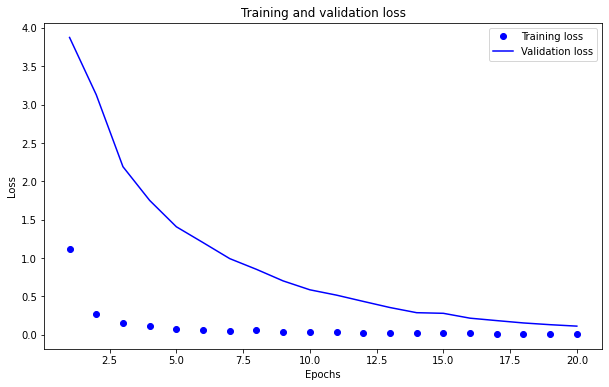

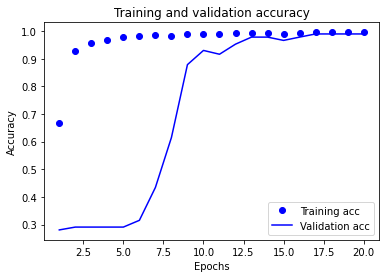

In [46]:
# Build our neural network model with LSTM

from keras import models
from keras import layers

max_features = 25000

from keras.layers import LSTM
model = models.Sequential()
model.add(layers.Embedding(max_features, 100)) 
model.add(layers.LSTM(32))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Iterate on your training data by calling the fit() method of your model
history = model.fit(X_train_res, y_train_res,
                    epochs=20,
                    batch_size=500,
                   validation_split=0.2)

# plot the results of loss values from the training set and validtion set
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.figure(figsize=(10,6))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# plot the results of accuracy from the training set and validtion set
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [47]:
results = model.evaluate(X_test, y_test)
print(results)

4741/4741 [==============================] - 3s 693us/step
[0.7927947158527837, 0.8460240364074707]


# Dropout

Now, we have got very high accuray on our testing dataset (about 0.98)

It seems like that we have overfitting problem.
(Note that the accuray in testing dataset is about 0.84).

So let's try the "dropout" technique to deal with this problem.

# Model 5: Predict 7 classes:

25000 features

20 epochs

drop = 0.2

recurrent_dropout=0.2

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 47919 samples, validate on 11980 samples
Epoch 1/20
47919/47919 [==============================] - 28s 584us/step - loss: 1.2239 - accuracy: 0.6417 - val_loss: 3.5892 - val_accuracy: 0.2843
Epoch 2/20
47919/47919 [==============================] - 27s 572us/step - loss: 0.3545 - accuracy: 0.8950 - val_loss: 4.0570 - val_accuracy: 0.2907
Epoch 3/20
47919/47919 [==============================] - 27s 568us/step - loss: 0.2062 - accuracy: 0.9367 - val_loss: 3.5857 - val_accuracy: 0.2907
Epoch 4/20
47919/47919 [==============================] - 28s 582us/step - loss: 0.1498 - accuracy: 0.9550 - val_loss: 2.9285 - val_accuracy: 0.2907
Epoch 5/20
47919/47919 [==============================] - 28s 582us/step - loss: 0.1161 - accuracy: 0.9649 - val_loss: 2.3115 - val_accuracy: 0.2907
Epoch 6/20
47919/47919 [==============================] - 28s 580us/step - loss: 0.0926 - accuracy: 0.9730 - val_loss: 2.0296 - val_accuracy: 0.2907
Epoch 7/20
47919/47919 [==============================] 

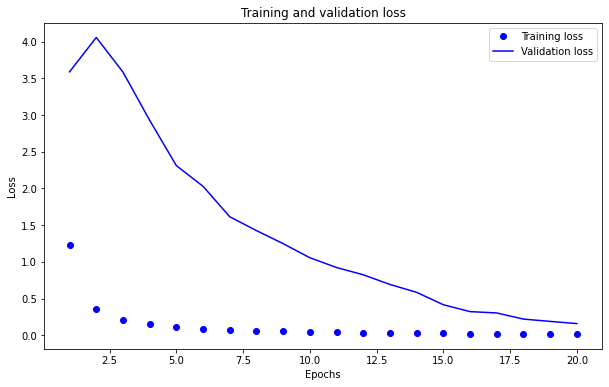

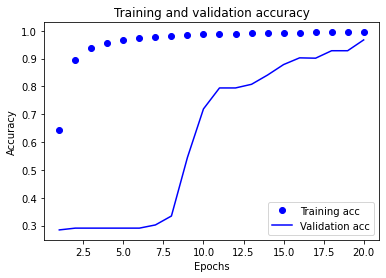

In [48]:
# Build our neural network model with LSTM

from keras import models
from keras import layers

max_features = 25000

from keras.layers import LSTM
model = models.Sequential()
model.add(layers.Embedding(max_features, 100)) 
model.add(layers.LSTM(32,dropout=0.2, recurrent_dropout=0.2)) # Note we use "dropout" technique here.
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Iterate on your training data by calling the fit() method of your model
history = model.fit(X_train_res, y_train_res,
                    epochs=20,
                    batch_size=500,
                   validation_split=0.2)

# plot the results of loss values from the training set and validtion set
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.figure(figsize=(10,6))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# plot the results of accuracy from the training set and validtion set
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [49]:
results = model.evaluate(X_test, y_test)
print(results)

4741/4741 [==============================] - 4s 745us/step
[0.7814383024066542, 0.8470786809921265]
